## Import 

In [5]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.datasets import load_boston
from sklearn.linear_model import Lasso,LassoCV,Ridge,RidgeCV

In [6]:
boston = load_boston()
X = pd.DataFrame(boston.data,columns=boston.feature_names)
y = boston.target

## Lasso Regression

In [12]:
# lambda
lasso = Lasso(alpha=10)
lasso.fit(X,y)
# lasso.coef_

pd.DataFrame(list(zip(X.columns,lasso.coef_)), columns=['cols','coefs'])

,cols,coefs
0,CRIM,-0.000000
1,ZN,0.026146
2,INDUS,-0.000000
3,CHAS,0.000000
4,NOX,0.000000
5,RM,0.000000
6,AGE,0.000000
7,DIS,-0.000000
8,RAD,0.000000
9,TAX,-0.009282


In [13]:
lasso.coef_

array([-0.        ,  0.02614602, -0.        ,  0.        ,  0.        ,
        0.        ,  0.        , -0.        ,  0.        , -0.00928242,
       -0.        ,  0.00749584, -0.56403807])

In [25]:
X.columns.values

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype=object)

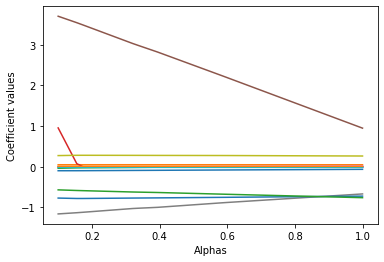

In [35]:
alphas = np.linspace(0.1,1,50)
coefs = []

for alpha in alphas:
    lasso = Lasso(alpha).fit(X,y)
    coefs.append(lasso.coef_)

plt.plot(alphas,coefs)
plt.xlabel('Alphas')
plt.ylabel('Coefficient values')
# plt.legend()
plt.show()

## LassoCV

In [33]:
alphas = np.linspace(0.1,1,20)
model = LassoCV(alphas=alphas,cv=3)
model.fit(X,y)

LassoCV(alphas=array([0.1       , 0.14736842, 0.19473684, 0.24210526, 0.28947368,
       0.33684211, 0.38421053, 0.43157895, 0.47894737, 0.52631579,
       0.57368421, 0.62105263, 0.66842105, 0.71578947, 0.76315789,
       0.81052632, 0.85789474, 0.90526316, 0.95263158, 1.        ]),
        copy_X=True, cv=3, eps=0.001, fit_intercept=True, max_iter=1000,
        n_alphas=100, n_jobs=None, normalize=False, positive=False,
        precompute='auto', random_state=None, selection='cyclic', tol=0.0001,
        verbose=False)

In [34]:
model.alpha_

0.1473684210526316

In [40]:
pd.DataFrame(list(zip(X.columns,model.coef_)),columns=['columns','coefficients'])

,columns,coefficients
0,CRIM,-0.097422
1,ZN,0.049452
2,INDUS,-0.027931
3,CHAS,0.198624
4,NOX,-0.000000
5,RM,3.566580
6,AGE,-0.007402
7,DIS,-1.135205
8,RAD,0.280667
9,TAX,-0.015012


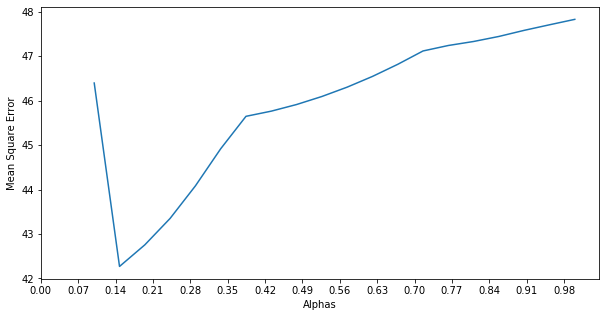

In [56]:
plt.figure(figsize=(10,5))
plt.plot(model.alphas_,model.mse_path_.mean(axis=1))
plt.xticks(np.arange(0,1,0.07))
plt.xlabel('Alphas')
plt.ylabel('Mean Square Error')
plt.show()

In [58]:
from sklearn.metrics import r2_score

lasso = Lasso(model.alpha_)
lasso.fit(X,y)
y_pred = lasso.predict(X)

r2_score(y,y_pred)

0.7243413446594407

In [62]:
from sklearn.model_selection import cross_val_score

cross_val_score(Lasso(model.alpha_),X,y,cv=5,scoring="r2")

array([ 0.67154043,  0.73201807,  0.61040302,  0.11491392, -0.1110466 ])

## Ridge CV

In [73]:
ridge_cv = RidgeCV(alphas=alphas,cv=3).fit(X,y)
ridge_cv.alphas

array([0.1       , 0.11836735, 0.13673469, 0.15510204, 0.17346939,
       0.19183673, 0.21020408, 0.22857143, 0.24693878, 0.26530612,
       0.28367347, 0.30204082, 0.32040816, 0.33877551, 0.35714286,
       0.3755102 , 0.39387755, 0.4122449 , 0.43061224, 0.44897959,
       0.46734694, 0.48571429, 0.50408163, 0.52244898, 0.54081633,
       0.55918367, 0.57755102, 0.59591837, 0.61428571, 0.63265306,
       0.65102041, 0.66938776, 0.6877551 , 0.70612245, 0.7244898 ,
       0.74285714, 0.76122449, 0.77959184, 0.79795918, 0.81632653,
       0.83469388, 0.85306122, 0.87142857, 0.88979592, 0.90816327,
       0.92653061, 0.94489796, 0.96326531, 0.98163265, 1.        ])

In [86]:
ridge_cv.alphas.shape

(50,)

In [90]:
ridge_cv.coef_

array([-1.04595278e-01,  4.74432243e-02, -8.80467889e-03,  2.55239322e+00,
       -1.07770146e+01,  3.85400020e+00, -5.41453810e-03, -1.37265353e+00,
        2.90141589e-01, -1.29116463e-02, -8.76074394e-01,  9.67327945e-03,
       -5.33343225e-01])

In [92]:
X.shape,y.shape

((506, 13), (506,))

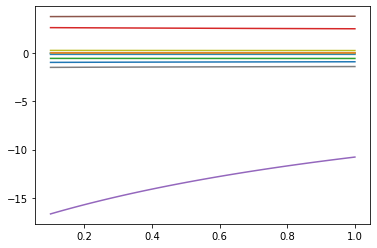

In [100]:
coefs = []

for alpha in alphas:
    model = Ridge(alpha).fit(X,y)
    coefs.append(model.coef_)
    
plt.plot(ridge_cv.alphas,coefs)
plt.show()